# In this notebook we visualize effects of different parameters in creating flat maps

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import akita_utils.format_io

# sns.set_theme()

# Importing scores from simulations

In [2]:
h5_dirs = "/scratch1/kamulege/shuffled_seqs_scores_3/*/*.h5"
dfs = []
for h5_file in glob.glob(h5_dirs):
    dfs.append(akita_utils.format_io.h5_to_df(h5_file, drop_duplicates_key=None))    
dfs = pd.concat(dfs)


In [3]:
dfs["mean_SCD_score"] = (dfs["SCD_h1_m1_t0"]+dfs["SCD_h1_m1_t1"]+dfs["SCD_h1_m1_t2"]+dfs["SCD_h1_m1_t3"]+dfs["SCD_h1_m1_t4"]+dfs["SCD_h1_m1_t5"])/6

# General scores distribution

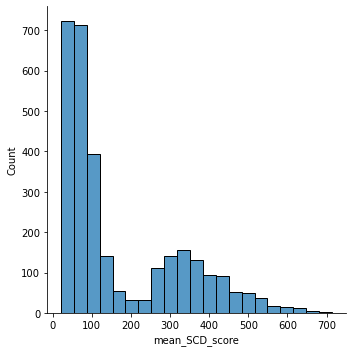

In [4]:
dfs.reset_index(drop=True, inplace=True)
sns.displot(dfs, x="mean_SCD_score")

# How the mutation method affects sequence scores

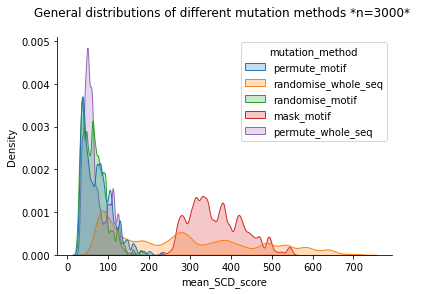

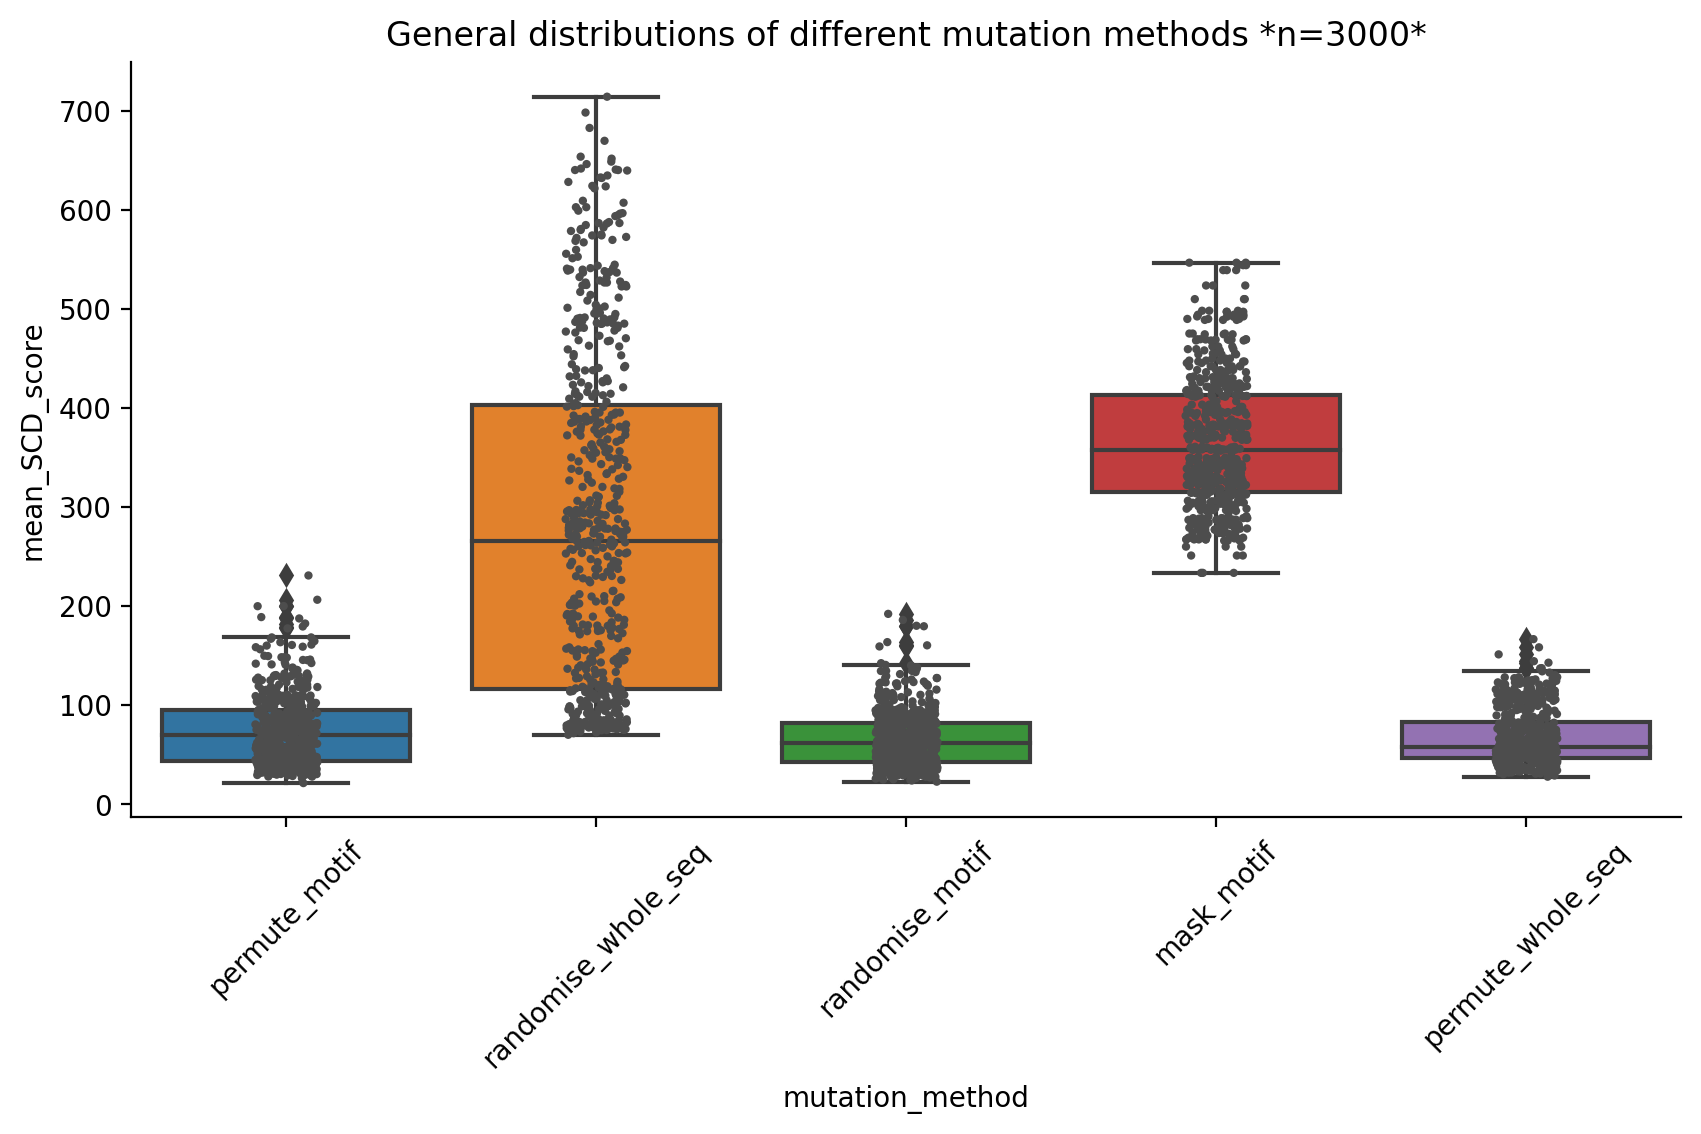

In [5]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="mutation_method", bw_adjust=.3, fill=True)
plt.title(f"General distributions of different mutation methods *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

plt.figure(figsize=(10,5),dpi=200)
ax = sns.boxplot(data=dfs, x='mutation_method', y="mean_SCD_score")
ax.tick_params(axis='x', labelrotation=45)
sns.stripplot(x="mutation_method", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different mutation methods *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()
plt.close()

# How the shuffle parameter affects sequence scores

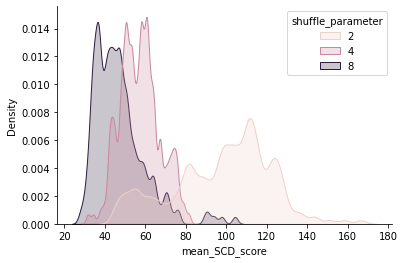

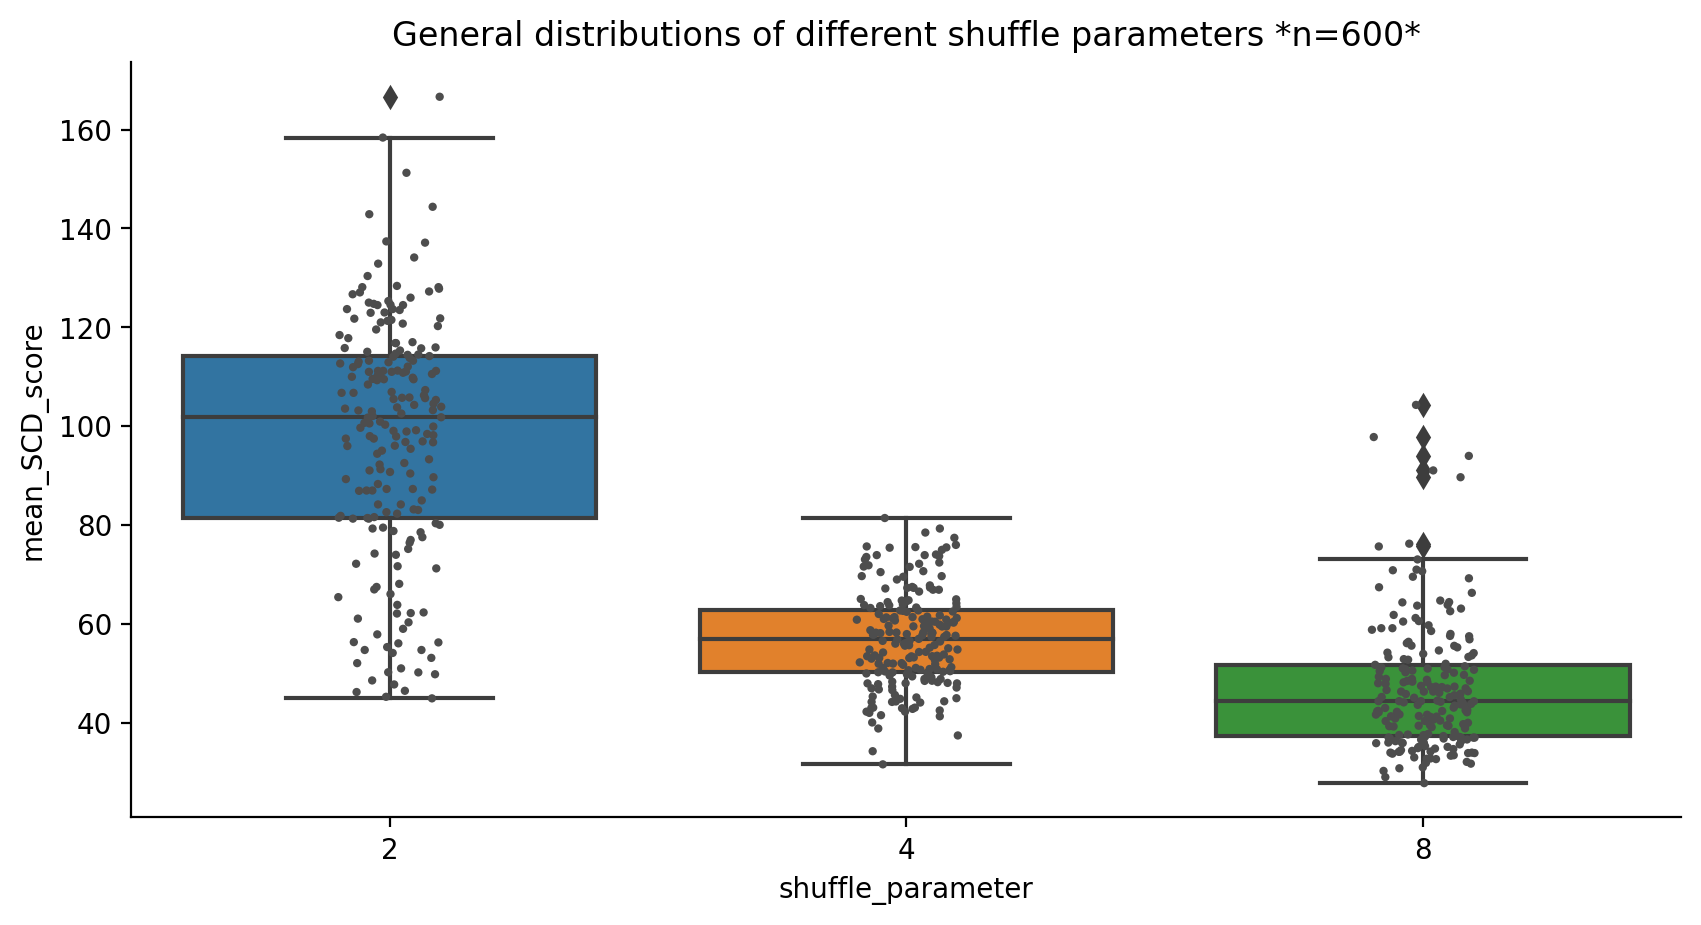

In [6]:
new_dfs = dfs.loc[dfs["mutation_method"]=="permute_whole_seq"]

sns.color_palette("tab10")
sns.kdeplot(data=new_dfs, x="mean_SCD_score", hue="shuffle_parameter", bw_adjust=.3, fill=True)
sns.despine(top = True, right = True)
plt.show()

plt.figure(figsize=(10,5),dpi=200)
sns.boxplot(data=new_dfs, x='shuffle_parameter', y="mean_SCD_score")
sns.stripplot(x="shuffle_parameter", y="mean_SCD_score", data=new_dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different shuffle parameters *n={new_dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()
# for score in [2,4,8]:
#     df_dummy_parameter = new_dfs.loc[dfs["shuffle_parameter"]==score]
#     plt.figure(figsize=(10,5)) # ,dpi=200
#     ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y="mean_SCD_score")
#     ax.tick_params(axis='x', labelrotation=45)
#     sns.stripplot(x="mutation_method", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
#     plt.title(f"Disecting shuffling by {score} basepairs *n={df_dummy_parameter.shape[0]}*")
#     sns.despine(top = True, right = True)
#     plt.show()
#     plt.close()

# ctcf detection threshold effect exploration

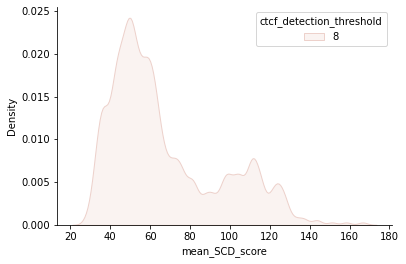

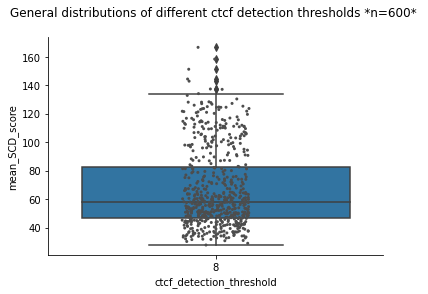

In [7]:
new_dfs = dfs.loc[dfs["mutation_method"]=="permute_whole_seq"]

sns.kdeplot(data=new_dfs, x="mean_SCD_score", hue="ctcf_detection_threshold", bw_adjust=.3, fill=True)
sns.despine(top = True, right = True)
plt.show()
sns.boxplot(data=new_dfs, x='ctcf_detection_threshold', y="mean_SCD_score")
sns.stripplot(x="ctcf_detection_threshold", y="mean_SCD_score", data=new_dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different ctcf detection thresholds *n={new_dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

# for score in [5,8,12]:
#     df_dummy_parameter = dfs.loc[dfs["ctcf_detection_threshold"]==score]
#     plt.figure(figsize=(10,5))
#     ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y="mean_SCD_score")
#     ax.tick_params(axis='x', labelrotation=45)
#     sns.stripplot(x="mutation_method", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
#     plt.title(f"Disecting {score} as ctcf detection threshold *n={df_dummy_parameter.shape[0]}* \n")
#     sns.despine(top = True, right = True)
#     plt.show()
#     plt.close()

# GC content effect exploration

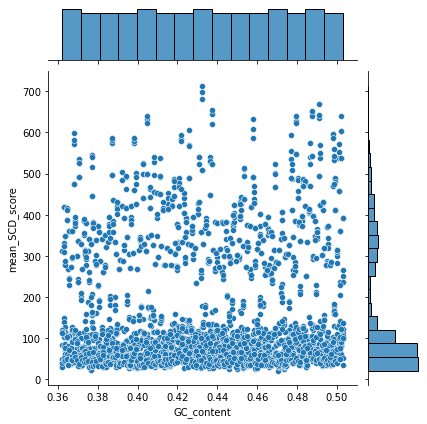

In [8]:
sns.jointplot(data=dfs, y=f"mean_SCD_score", x = "GC_content") #, hue="shuffle_parameter"

<Figure size 2000x1000 with 0 Axes>

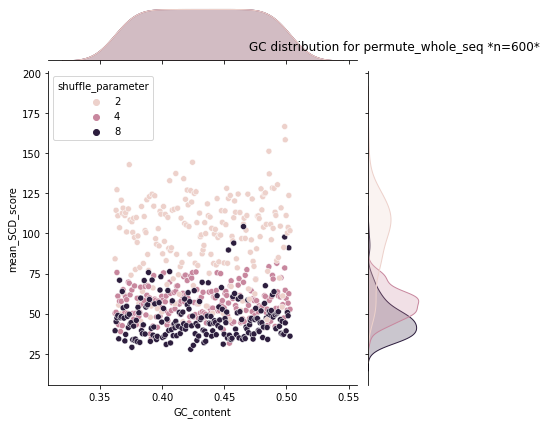

In [9]:
for score in ['permute_whole_seq']: # ,'randomise_whole_seq','mask_motif','permute_motif','randomise_motif'
    df_dummy_parameter = dfs.loc[dfs["mutation_method"]==score]
    plt.figure(figsize=(10,5),dpi=200)
    sns.jointplot(data=df_dummy_parameter, y=f"mean_SCD_score", x = "GC_content", hue="shuffle_parameter", color=".3")
    plt.title(f"GC distribution for {score} *n={df_dummy_parameter.shape[0]}*\n")